In [1]:
# Supervised learning
# guid --> target

# data --->            apa? 
# warna    bentuk      target
# kurning  bulat       jeruk 0
# merah.   lonceng.    jambu 1
# kuning.  panjang.    pisang 2

# Regression [value dari target continue: Real]
#     - linear regression y = m*x + c
#     - nonlinear regresssion = selain itu y = x^2

# Classification [value dari target diskrit: Natural]
#     tanggal_beli ----> panjang_pensil
#     tahun_belajar ---> jumlan_pensil_yang_dibeli

In [2]:
# Linear regression --> y = m*x + c
# yang dicari m dan c
# y: target
# x: input
# evaluasi: RMSE (Root Mean Square Error)

In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np

def get_df_with_string():
    cols = ['sepal length', 
           'sepal width',
           'petal length',
           'petal width']
    iris = datasets.load_iris()
    target_dict = {
        0: 'setosa',
        1: 'versicolor',
        2: 'virginica'
    }
    target = iris.target
    new_target = []
    for t in target:
        new_target.append(target_dict[t])
    print("target_name: ", set(new_target))
    df = pd.DataFrame(iris.data)
    df.columns = cols
    df['target'] = new_target
    df['target_int'] = target
    return df

data = get_df_with_string()
data.tail()

target_name:  {'setosa', 'virginica', 'versicolor'}


,sepal length,sepal width,petal length,petal width,target,target_int
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


In [4]:
data = data[['petal length', 'petal width']]
data.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [5]:
len(data)

150

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
data.columns = ['x', 'y']
train, test = train_test_split(data, test_size=0.2)
print(len(train), len(test))
data = train

120 30


In [8]:
print(len(train), len(test))

120 30


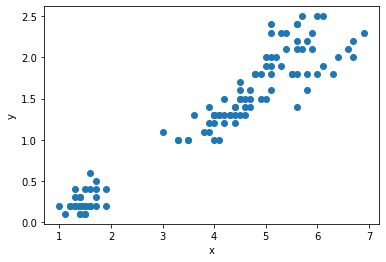

In [9]:
import matplotlib.pyplot as plt

def plot(data, x, y):
    plt.scatter(data[x], data[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    return None

plot(data, 'x', 'y')



# cari m

$$m=\frac{\sum_{i=1}^n (x_i-\hat{x})(y_i-\hat{y})}{\sum_{i=1}^n (x_i-\hat{x})^2}$$

$\hat{x}$: mean/average dari x

$\hat{y}$: mean/average dari y

In [10]:
mean_x = np.mean(data['x'])
mean_y = np.mean(data['y'])
mean_x, mean_y

(3.790833333333333, 1.2083333333333333)

In [11]:
# hitung (x_i - mean(x))
data['x-mean(x)'] = data['x'] - mean_x
data.head()

,x,y,x-mean(x)
113,5.0,2.0,1.209167
130,6.1,1.9,2.309167
140,5.6,2.4,1.809167
47,1.4,0.2,-2.390833
45,1.4,0.3,-2.390833


In [12]:
data['y-mean(y)'] = data['y'] - mean_y
data.head()

,x,y,x-mean(x),y-mean(y)
113,5.0,2.0,1.209167,0.791667
130,6.1,1.9,2.309167,0.691667
140,5.6,2.4,1.809167,1.191667
47,1.4,0.2,-2.390833,-1.008333
45,1.4,0.3,-2.390833,-0.908333


In [13]:
data['(x-mean(x))^2'] = data['x-mean(x)']**2
data.head()

,x,y,x-mean(x),y-mean(y),(x-mean(x))^2
113,5.0,2.0,1.209167,0.791667,1.462084
130,6.1,1.9,2.309167,0.691667,5.332251
140,5.6,2.4,1.809167,1.191667,3.273084
47,1.4,0.2,-2.390833,-1.008333,5.716084
45,1.4,0.3,-2.390833,-0.908333,5.716084


In [14]:
data['(x-mean(x))(y-mean(y))'] = data['x-mean(x)']*data['y-mean(y)']
data.head()

,x,y,x-mean(x),y-mean(y),(x-mean(x))^2,(x-mean(x))(y-mean(y))
113,5.0,2.0,1.209167,0.791667,1.462084,0.957257
130,6.1,1.9,2.309167,0.691667,5.332251,1.597174
140,5.6,2.4,1.809167,1.191667,3.273084,2.155924
47,1.4,0.2,-2.390833,-1.008333,5.716084,2.410757
45,1.4,0.3,-2.390833,-0.908333,5.716084,2.171674


In [15]:
sum_x_sq = np.sum(data['(x-mean(x))^2'])
sum_x_y = np.sum(data['(x-mean(x))(y-mean(y))'])
sum_x_sq, sum_x_y

(376.51991666666663, 155.76916666666665)

In [16]:
# m
m = sum_x_y/sum_x_sq
m

0.41370764140630895

In [17]:
# c
# y = m*x + c
# c = y - m*x
c = mean_y - m*mean_x
c


-0.3599633839644161

In [18]:
data['prediction'] = m*data['x'] + c
data.head()

,x,y,x-mean(x),y-mean(y),(x-mean(x))^2,(x-mean(x))(y-mean(y)),prediction
113,5.0,2.0,1.209167,0.791667,1.462084,0.957257,1.708575
130,6.1,1.9,2.309167,0.691667,5.332251,1.597174,2.163653
140,5.6,2.4,1.809167,1.191667,3.273084,2.155924,1.956799
47,1.4,0.2,-2.390833,-1.008333,5.716084,2.410757,0.219227
45,1.4,0.3,-2.390833,-0.908333,5.716084,2.171674,0.219227


In [19]:
# test
test['prediction'] = m*test['x'] + c
test.head()

,x,y,prediction
48,1.5,0.2,0.260598
81,3.7,1.0,1.170755
19,1.5,0.3,0.260598
15,1.5,0.4,0.260598
135,6.1,2.3,2.163653


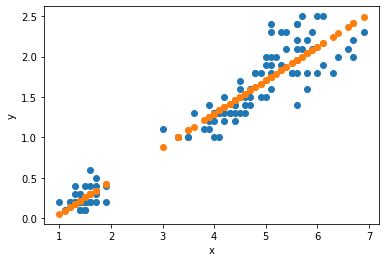

In [20]:
def plot_grup(data, x, y_list):
    for y in y_list:
        plt.scatter(data[x], data[y])
    plt.xlabel(x)
    plt.ylabel('y')
    plt.show()
    return None
plot_grup(data, 'x', ['y', 'prediction'])

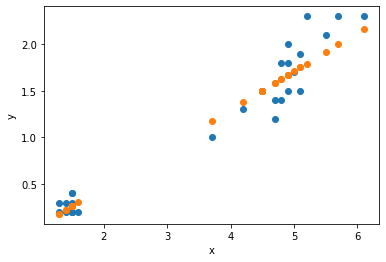

In [21]:
plot_grup(test, 'x', ['y', 'prediction'])

### R square value: seberapa akurat sih model kita

$$R^2 = \frac{\sum{(y_{pred}-\hat{y})^2}}{\sum{(y-\hat{y})^2}}$$

In [22]:
data['y_pred-mean(y)'] = (data['prediction'] - mean_y)**2
data.head()

,x,y,x-mean(x),y-mean(y),(x-mean(x))^2,(x-mean(x))(y-mean(y)),prediction,y_pred-mean(y)
113,5.0,2.0,1.209167,0.791667,1.462084,0.957257,1.708575,0.250242
130,6.1,1.9,2.309167,0.691667,5.332251,1.597174,2.163653,0.912636
140,5.6,2.4,1.809167,1.191667,3.273084,2.155924,1.956799,0.560201
47,1.4,0.2,-2.390833,-1.008333,5.716084,2.410757,0.219227,0.978331
45,1.4,0.3,-2.390833,-0.908333,5.716084,2.171674,0.219227,0.978331


In [23]:
sum_y_ymean = np.sum(data['y-mean(y)']**2)
sum_y_pred_ymean2 = np.sum(data['y_pred-mean(y)'])
sum_y_ymean, sum_y_pred_ymean2

(69.73166666666667, 64.4428945454929)

In [24]:
R = sum_y_pred_ymean2/sum_y_ymean
R

0.9241553748248224

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [26]:
l = len(data)
reg = LinearRegression()
reg = reg.fit(data[['x']].to_numpy(), data['y'])

Y_pred = reg.predict(data[['x']].to_numpy())
r2_square = reg.score(data[['x']], data['y'])
print(r2_square)

0.9241553748248225


In [27]:
LinearRegression?

In [28]:
import pickle

# saving model
with open('linear_reg_model.pkl','wb') as f:
    pickle.dump(reg, f)

In [29]:
# load
with open('linear_reg_model.pkl', 'rb') as f:
    model_loaded = pickle.load(f)

model_loaded.predict(data[['x']])

array([1.70857482, 2.16365323, 1.95679941, 0.21922731, 0.21922731,
       2.28776552, 1.74994559, 0.34333961, 1.41897947, 1.58446253,
       0.30196884, 1.91542864, 1.87405788, 1.46035024, 1.74994559,
       0.34333961, 1.95679941, 2.03954094, 1.66720406, 0.21922731,
       0.26059808, 0.21922731, 0.30196884, 1.70857482, 0.05374426,
       0.26059808, 2.16365323, 1.83268712, 2.03954094, 1.66720406,
       1.25349642, 0.30196884, 0.42608113, 1.99817017, 2.24639476,
       1.33623795, 0.21922731, 2.12228246, 1.501721  , 1.70857482,
       1.62583329, 1.25349642, 1.83268712, 2.49461934, 1.37760871,
       1.08801336, 0.21922731, 1.79131635, 1.501721  , 1.74994559,
       1.46035024, 0.30196884, 1.25349642, 1.58446253, 1.29486718,
       1.46035024, 1.74994559, 1.95679941, 1.33623795, 1.41897947,
       1.58446253, 1.54309177, 0.21922731, 0.26059808, 0.21922731,
       0.17785655, 0.26059808, 1.501721  , 2.12228246, 1.501721  ,
       0.30196884, 1.54309177, 0.17785655, 1.29486718, 0.88115

In [30]:
# y = m * x + c
# y = m1 * x**n + m2* x**(n-1) + .... + c

In [31]:
# ada kaitan antara RMSE dengan 
# koefisien kolerasi (Pearson correlation)

# x dan y
# + 1 (terkolerasi linear)
#   0 (tidak terkolerasi linear)
# - 1 (terkolerasi linear terbalik)

In [32]:
data[['x', 'y']].corr()

,x,y
x,1.00000,0.96133
y,0.96133,1.00000


In [33]:
import sklearn

dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_distributor_init',
 '_loss',
 'base',
 'clone',
 'config_context',
 'datasets',
 'exceptions',
 'externals',
 'feature_extraction',
 'get_config',
 'linear_model',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'os',
 'preprocessing',
 'set_config',
 'setup_module',
 'show_versions',
 'svm',
 'sys',
 'utils']

In [34]:
from sklearn import linear_model

dir(linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'GammaRegressor',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'PoissonRegressor',
 'RANSACRegressor',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 'TweedieRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bayes',
 '_cd_fast',
 '_coordinate_descent',
 '_glm',
 '_huber',
 '_least_angle',
 '_logistic',
 '_omp',
 '_pa